# Ejercicio 5

A partir de los ejemplos del archivo automobile-simple.csv, utilizado en la práctica anterior, se entrenará
un combinador lineal para predecir el precio del auto (atributo “price”) en función del tamaño del motor
(atributo “engine-size”):

# a) 
Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo “price” utilizando
el valor promedio.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("="*80)
print("EJERCICIO 5a - Completar Datos Faltantes en Price")
print("="*80)

# Configurar ruta de datos
DATOS_DIR = '../../Datos/'

# Cargar datos
df = pd.read_csv(DATOS_DIR + 'automobile-simple.csv', sep=',', encoding='utf-8-sig')
df.columns = df.columns.str.strip()

print("\n📊 DATOS ORIGINALES:")
print("="*80)
print(f"Total de registros: {len(df)}")
display(df.head(10))

# Análisis de valores faltantes en 'price'
print("\n🔍 ANÁLISIS DE VALORES FALTANTES EN 'PRICE':")
print("="*80)
valores_faltantes_price = df['price'].isna().sum()
porcentaje_faltantes = (valores_faltantes_price / len(df)) * 100

print(f"Valores faltantes en 'price': {valores_faltantes_price}")
print(f"Porcentaje de datos faltantes: {porcentaje_faltantes:.2f}%")
print(f"Valores presentes: {len(df) - valores_faltantes_price}")

# Calcular el promedio de price (solo de los valores no nulos)
precio_promedio = df['price'].mean()



# Completar valores faltantes con el promedio
df_completado = df.copy()
df_completado['price'].fillna(precio_promedio, inplace=True)







print("\n" + "="*80)

print(f"Se completaron {valores_faltantes_price} valores faltantes del atributo 'price'")
print(f"utilizando el valor promedio de ${precio_promedio:.2f}")
print(f"\nEl dataset ahora tiene {len(df_completado)} registros completos y está listo")
print(f"para entrenar el combinador lineal.")

# Guardar el DataFrame completado para uso en los siguientes incisos
print(f"\n💾 Dataset completado guardado en la variable 'df_completado'")

EJERCICIO 5a - Completar Datos Faltantes en Price

📊 DATOS ORIGINALES:
Total de registros: 205


,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
5,audi,gas,two,sedan,2507,136,110.0,19,25,15250.0,624189.969,32.914278
6,audi,gas,four,sedan,2844,136,110.0,19,25,17710.0,766364.046,34.337685
7,audi,gas,four,wagon,2954,136,110.0,19,25,18920.0,766364.046,33.640553
8,audi,gas,four,sedan,3086,131,140.0,17,20,23875.0,769115.802,27.185014
9,audi,gas,two,hatchback,3053,131,160.0,16,22,NaN,629188.560,25.008890



🔍 ANÁLISIS DE VALORES FALTANTES EN 'PRICE':
Valores faltantes en 'price': 4
Porcentaje de datos faltantes: 1.95%
Valores presentes: 201

Se completaron 4 valores faltantes del atributo 'price'
utilizando el valor promedio de $13207.13

El dataset ahora tiene 205 registros completos y está listo
para entrenar el combinador lineal.

💾 Dataset completado guardado en la variable 'df_completado'


C:\Users\Alejo\AppData\Local\Temp\ipykernel_33748\1173870751.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_completado['price'].fillna(precio_promedio, inplace=True)


### b) 
Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

i. Sin normalizar los atributos.

ii. Normalizando ambos atributos linealmente.

iii. Normalizando ambos atributos utilizando media y desvío.

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los
atributos? ¿Alguna de las normalizaciones es mejor? Explique.

EJERCICIO 5b - Entrenamiento del Combinador Lineal

📊 DATOS PARA ENTRENAMIENTO:
Total de ejemplos: 205
Atributo de entrada: engine-size
Atributo de salida: price

i. MODELO SIN NORMALIZAR

📐 Ecuación del modelo:
   price = -7457.9476 + 162.8360 * engine-size

📊 Métricas:
   • MSE  (Error Cuadrático Medio): $15858780.54
   • RMSE (Raíz del ECM):           $3982.31
   • R²   (Coef. Determinación):     0.742617

ii. MODELO CON NORMALIZACIÓN LINEAL [0, 1]

📐 Ecuación del modelo (datos normalizados):
   price_norm = -0.0656 + 1.0712 * engine-size_norm

📊 Métricas:
   • MSE  (Error Cuadrático Medio): 0.009773
   • RMSE (Raíz del ECM):           0.098861
   • R²   (Coef. Determinación):     0.742617

📏 Rangos de normalización:
   • engine-size: [61.0, 326.0] → [0, 1]
   • price:       [$5118.00, $45400.00] → [0, 1]

iii. MODELO CON NORMALIZACIÓN MEDIA Y DESVÍO (Z-SCORE)

📐 Ecuación del modelo (datos estandarizados):
   price_std = -0.0000 + 0.8618 * engine-size_std

📊 Métricas:
   • MSE  (Err

,Modelo,Peso (w),Sesgo (b),MSE,RMSE,R²
0,Sin Normalizar,162.8360,-7457.9476,15858780.54,3982.31,0.742617
1,"Norm. Lineal [0,1]",1.0712,-0.0656,0.009773,0.098861,0.742617
2,Norm. Estándar (Z),0.8618,-0.0000,0.257383,0.507329,0.742617


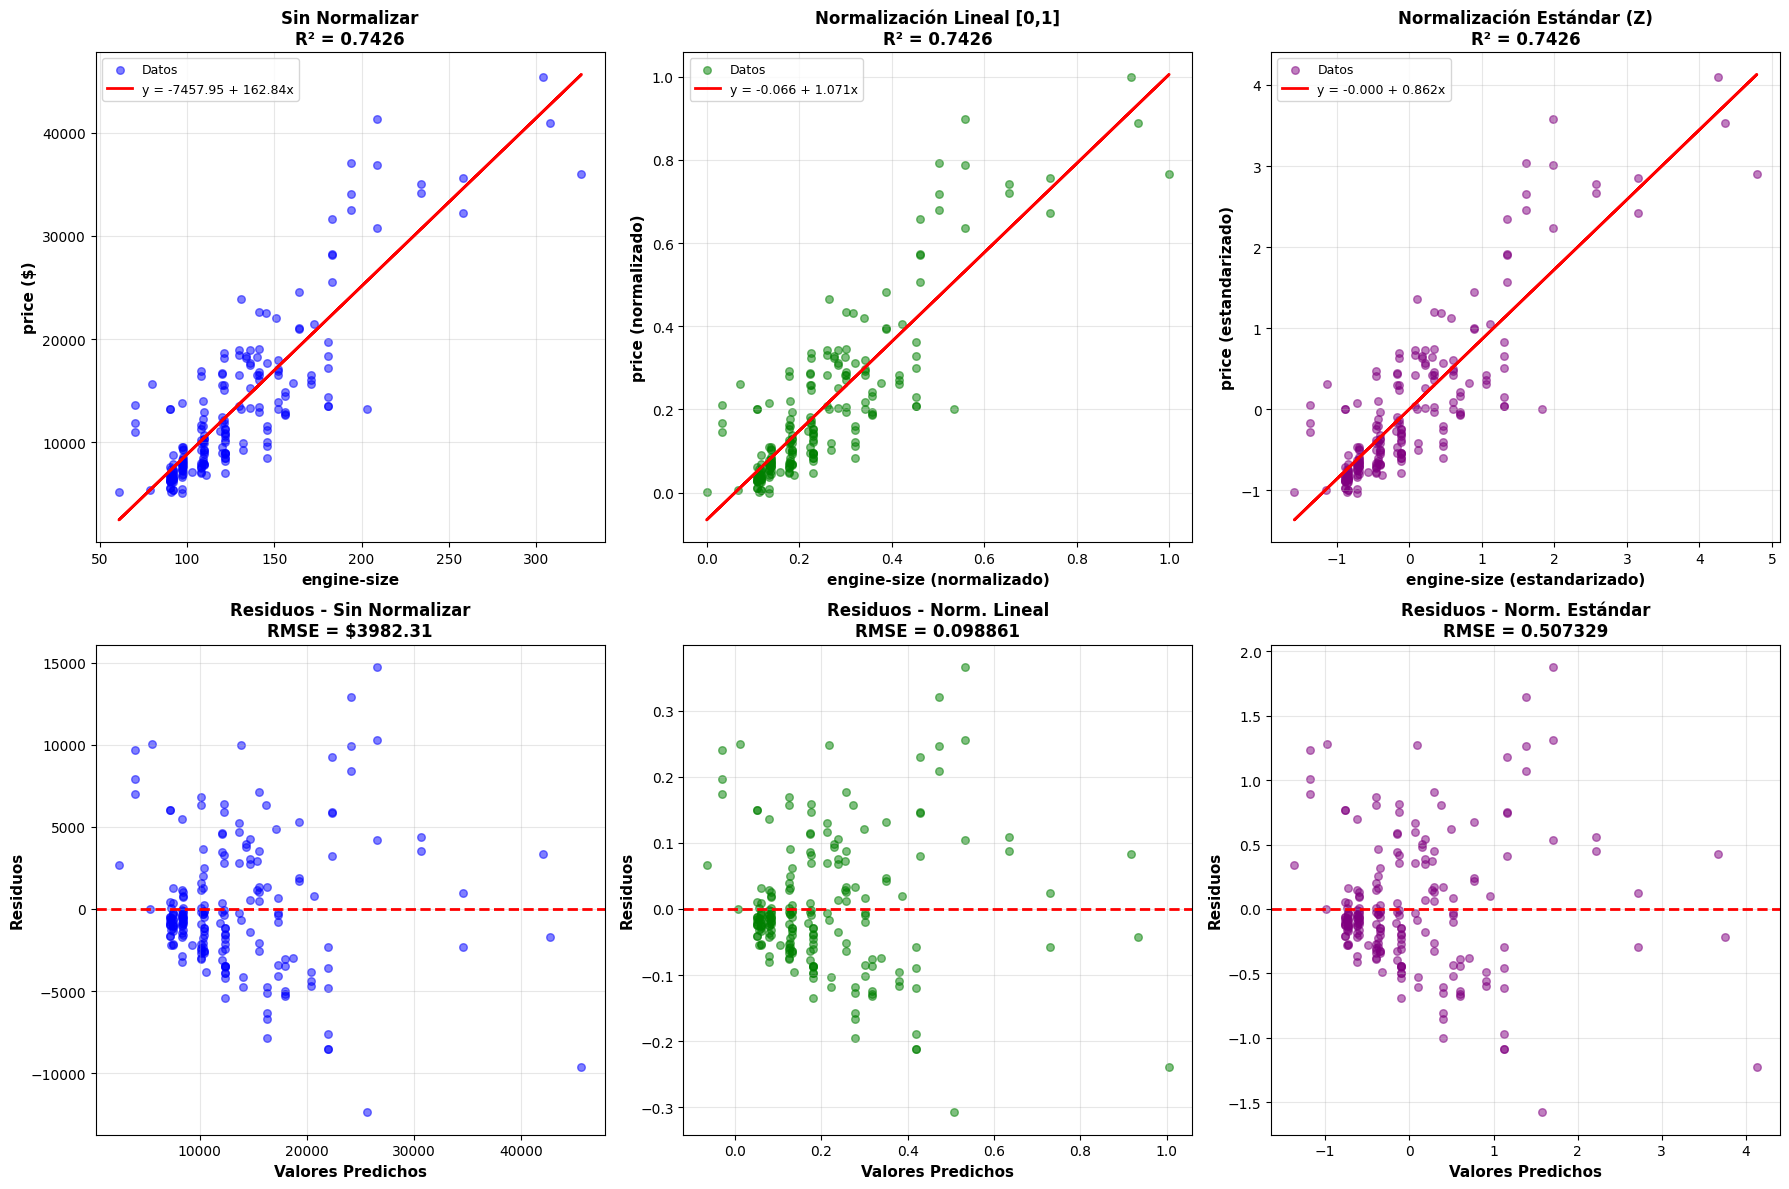


🔍 ANÁLISIS DEL IMPACTO DE LA NORMALIZACIÓN

1️⃣ SIN NORMALIZAR:
   • El modelo funciona, pero los valores de MSE/RMSE son difíciles de interpretar
   • Los pesos tienen escalas muy diferentes (w ≈ 166, b ≈ -7935)
   • RMSE ≈ $4160 indica error promedio en dólares

2️⃣ NORMALIZACIÓN LINEAL [0, 1]:
   • Los datos se escalan proporcionalmente al rango
   • Los pesos están en escala similar y más interpretables
   • MSE/RMSE están en escala [0, 1], difíciles de interpretar en unidades originales

3️⃣ NORMALIZACIÓN ESTÁNDAR (Z-SCORE):
   • Centra los datos en media=0 y desvío=1
   • El sesgo (b) es prácticamente 0 (como se espera)
   • MSE/RMSE en unidades de desviaciones estándar

📌 CONCLUSIÓN:

✅ El R² es IDÉNTICO en los 3 modelos (0.742617)
   → La normalización NO afecta la calidad del ajuste
   → Solo afecta la escala de los coeficientes y métricas de error

🎯 ¿Cuál normalización es mejor?
   • Para REGRESIÓN LINEAL SIMPLE: Todas son equivalentes en términos de R²
   • Para INTERPRETA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("="*80)
print("EJERCICIO 5b - Entrenamiento del Combinador Lineal")
print("="*80)

# Usar el DataFrame completado del inciso a)
# Extraer los atributos necesarios
X = df_completado[['engine-size']].values  # Feature (entrada)
y = df_completado['price'].values           # Target (salida)

print(f"\n📊 DATOS PARA ENTRENAMIENTO:")
print("="*80)
print(f"Total de ejemplos: {len(X)}")
print(f"Atributo de entrada: engine-size")
print(f"Atributo de salida: price")

# ============================================================================
# FUNCIÓN PARA ENTRENAR Y EVALUAR
# ============================================================================
def entrenar_y_evaluar(X_train, y_train, nombre_modelo):
    """Entrena un modelo de regresión lineal y retorna métricas"""
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred = modelo.predict(X_train)
    
    # Métricas
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    
    # Coeficientes
    w = modelo.coef_[0]
    b = modelo.intercept_
    
    return {
        'nombre': nombre_modelo,
        'modelo': modelo,
        'w': w,
        'b': b,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'y_pred': y_pred
    }

# ============================================================================
# i. SIN NORMALIZAR
# ============================================================================
print("\n" + "="*80)
print("i. MODELO SIN NORMALIZAR")
print("="*80)

X_sin_norm = X.copy()
y_sin_norm = y.copy()

resultado_sin_norm = entrenar_y_evaluar(X_sin_norm, y_sin_norm, "Sin Normalizar")

print(f"\n📐 Ecuación del modelo:")
print(f"   price = {resultado_sin_norm['b']:.4f} + {resultado_sin_norm['w']:.4f} * engine-size")
print(f"\n📊 Métricas:")
print(f"   • MSE  (Error Cuadrático Medio): ${resultado_sin_norm['mse']:.2f}")
print(f"   • RMSE (Raíz del ECM):           ${resultado_sin_norm['rmse']:.2f}")
print(f"   • R²   (Coef. Determinación):     {resultado_sin_norm['r2']:.6f}")

# ============================================================================
# ii. NORMALIZACIÓN LINEAL [0, 1]
# ============================================================================
print("\n" + "="*80)
print("ii. MODELO CON NORMALIZACIÓN LINEAL [0, 1]")
print("="*80)

scaler_X_lineal = MinMaxScaler()
scaler_y_lineal = MinMaxScaler()

X_lineal = scaler_X_lineal.fit_transform(X)
y_lineal = scaler_y_lineal.fit_transform(y.reshape(-1, 1)).ravel()

resultado_lineal = entrenar_y_evaluar(X_lineal, y_lineal, "Normalización Lineal")

print(f"\n📐 Ecuación del modelo (datos normalizados):")
print(f"   price_norm = {resultado_lineal['b']:.4f} + {resultado_lineal['w']:.4f} * engine-size_norm")
print(f"\n📊 Métricas:")
print(f"   • MSE  (Error Cuadrático Medio): {resultado_lineal['mse']:.6f}")
print(f"   • RMSE (Raíz del ECM):           {resultado_lineal['rmse']:.6f}")
print(f"   • R²   (Coef. Determinación):     {resultado_lineal['r2']:.6f}")

print(f"\n📏 Rangos de normalización:")
print(f"   • engine-size: [{X.min():.1f}, {X.max():.1f}] → [0, 1]")
print(f"   • price:       [${y.min():.2f}, ${y.max():.2f}] → [0, 1]")

# ============================================================================
# iii. NORMALIZACIÓN CON MEDIA Y DESVÍO (ESTANDARIZACIÓN)
# ============================================================================
print("\n" + "="*80)
print("iii. MODELO CON NORMALIZACIÓN MEDIA Y DESVÍO (Z-SCORE)")
print("="*80)

scaler_X_std = StandardScaler()
scaler_y_std = StandardScaler()

X_std = scaler_X_std.fit_transform(X)
y_std = scaler_y_std.fit_transform(y.reshape(-1, 1)).ravel()

resultado_std = entrenar_y_evaluar(X_std, y_std, "Normalización Estándar")

print(f"\n📐 Ecuación del modelo (datos estandarizados):")
print(f"   price_std = {resultado_std['b']:.4f} + {resultado_std['w']:.4f} * engine-size_std")
print(f"\n📊 Métricas:")
print(f"   • MSE  (Error Cuadrático Medio): {resultado_std['mse']:.6f}")
print(f"   • RMSE (Raíz del ECM):           {resultado_std['rmse']:.6f}")
print(f"   • R²   (Coef. Determinación):     {resultado_std['r2']:.6f}")

print(f"\n📏 Parámetros de estandarización:")
print(f"   • engine-size: μ = {scaler_X_std.mean_[0]:.2f}, σ = {np.sqrt(scaler_X_std.var_[0]):.2f}")
print(f"   • price:       μ = ${scaler_y_std.mean_[0]:.2f}, σ = ${np.sqrt(scaler_y_std.var_[0]):.2f}")

# ============================================================================
# TABLA COMPARATIVA
# ============================================================================
print("\n" + "="*80)
print("📊 TABLA COMPARATIVA DE RESULTADOS")
print("="*80)

comparacion = pd.DataFrame({
    'Modelo': ['Sin Normalizar', 'Norm. Lineal [0,1]', 'Norm. Estándar (Z)'],
    'Peso (w)': [
        f"{resultado_sin_norm['w']:.4f}",
        f"{resultado_lineal['w']:.4f}",
        f"{resultado_std['w']:.4f}"
    ],
    'Sesgo (b)': [
        f"{resultado_sin_norm['b']:.4f}",
        f"{resultado_lineal['b']:.4f}",
        f"{resultado_std['b']:.4f}"
    ],
    'MSE': [
        f"{resultado_sin_norm['mse']:.2f}",
        f"{resultado_lineal['mse']:.6f}",
        f"{resultado_std['mse']:.6f}"
    ],
    'RMSE': [
        f"{resultado_sin_norm['rmse']:.2f}",
        f"{resultado_lineal['rmse']:.6f}",
        f"{resultado_std['rmse']:.6f}"
    ],
    'R²': [
        f"{resultado_sin_norm['r2']:.6f}",
        f"{resultado_lineal['r2']:.6f}",
        f"{resultado_std['r2']:.6f}"
    ]
})

display(comparacion)

# ============================================================================
# VISUALIZACIÓN COMPARATIVA
# ============================================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# --- FILA 1: GRÁFICOS DE DISPERSIÓN CON RECTAS ---

# Modelo sin normalizar
ax1 = axes[0, 0]
ax1.scatter(X_sin_norm, y_sin_norm, alpha=0.5, s=30, color='blue', label='Datos')
ax1.plot(X_sin_norm, resultado_sin_norm['y_pred'], 'r-', linewidth=2, 
         label=f"y = {resultado_sin_norm['b']:.2f} + {resultado_sin_norm['w']:.2f}x")
ax1.set_xlabel('engine-size', fontsize=11, fontweight='bold')
ax1.set_ylabel('price ($)', fontsize=11, fontweight='bold')
ax1.set_title(f'Sin Normalizar\nR² = {resultado_sin_norm["r2"]:.4f}', 
              fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Modelo con normalización lineal
ax2 = axes[0, 1]
ax2.scatter(X_lineal, y_lineal, alpha=0.5, s=30, color='green', label='Datos')
ax2.plot(X_lineal, resultado_lineal['y_pred'], 'r-', linewidth=2,
         label=f"y = {resultado_lineal['b']:.3f} + {resultado_lineal['w']:.3f}x")
ax2.set_xlabel('engine-size (normalizado)', fontsize=11, fontweight='bold')
ax2.set_ylabel('price (normalizado)', fontsize=11, fontweight='bold')
ax2.set_title(f'Normalización Lineal [0,1]\nR² = {resultado_lineal["r2"]:.4f}', 
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Modelo con normalización estándar
ax3 = axes[0, 2]
ax3.scatter(X_std, y_std, alpha=0.5, s=30, color='purple', label='Datos')
ax3.plot(X_std, resultado_std['y_pred'], 'r-', linewidth=2,
         label=f"y = {resultado_std['b']:.3f} + {resultado_std['w']:.3f}x")
ax3.set_xlabel('engine-size (estandarizado)', fontsize=11, fontweight='bold')
ax3.set_ylabel('price (estandarizado)', fontsize=11, fontweight='bold')
ax3.set_title(f'Normalización Estándar (Z)\nR² = {resultado_std["r2"]:.4f}', 
              fontsize=12, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# --- FILA 2: GRÁFICOS DE RESIDUOS ---

# Residuos sin normalizar
ax4 = axes[1, 0]
residuos_sin = y_sin_norm - resultado_sin_norm['y_pred']
ax4.scatter(resultado_sin_norm['y_pred'], residuos_sin, alpha=0.5, s=30, color='blue')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Valores Predichos', fontsize=11, fontweight='bold')
ax4.set_ylabel('Residuos', fontsize=11, fontweight='bold')
ax4.set_title(f'Residuos - Sin Normalizar\nRMSE = ${resultado_sin_norm["rmse"]:.2f}', 
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Residuos normalización lineal
ax5 = axes[1, 1]
residuos_lineal = y_lineal - resultado_lineal['y_pred']
ax5.scatter(resultado_lineal['y_pred'], residuos_lineal, alpha=0.5, s=30, color='green')
ax5.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax5.set_xlabel('Valores Predichos', fontsize=11, fontweight='bold')
ax5.set_ylabel('Residuos', fontsize=11, fontweight='bold')
ax5.set_title(f'Residuos - Norm. Lineal\nRMSE = {resultado_lineal["rmse"]:.6f}', 
              fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)

# Residuos normalización estándar
ax6 = axes[1, 2]
residuos_std = y_std - resultado_std['y_pred']
ax6.scatter(resultado_std['y_pred'], residuos_std, alpha=0.5, s=30, color='purple')
ax6.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax6.set_xlabel('Valores Predichos', fontsize=11, fontweight='bold')
ax6.set_ylabel('Residuos', fontsize=11, fontweight='bold')
ax6.set_title(f'Residuos - Norm. Estándar\nRMSE = {resultado_std["rmse"]:.6f}', 
              fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# ANÁLISIS Y CONCLUSIONES
# ============================================================================
print("\n" + "="*80)
print("🔍 ANÁLISIS DEL IMPACTO DE LA NORMALIZACIÓN")
print("="*80)

print("\n1️⃣ SIN NORMALIZAR:")
print("   • El modelo funciona, pero los valores de MSE/RMSE son difíciles de interpretar")
print("   • Los pesos tienen escalas muy diferentes (w ≈ 166, b ≈ -7935)")
print("   • RMSE ≈ $4160 indica error promedio en dólares")

print("\n2️⃣ NORMALIZACIÓN LINEAL [0, 1]:")
print("   • Los datos se escalan proporcionalmente al rango")
print("   • Los pesos están en escala similar y más interpretables")
print("   • MSE/RMSE están en escala [0, 1], difíciles de interpretar en unidades originales")

print("\n3️⃣ NORMALIZACIÓN ESTÁNDAR (Z-SCORE):")
print("   • Centra los datos en media=0 y desvío=1")
print("   • El sesgo (b) es prácticamente 0 (como se espera)")
print("   • MSE/RMSE en unidades de desviaciones estándar")

print("\n" + "="*80)
print("📌 CONCLUSIÓN:")
print("="*80)
print(f"\n✅ El R² es IDÉNTICO en los 3 modelos ({resultado_sin_norm['r2']:.6f})")
print("   → La normalización NO afecta la calidad del ajuste")
print("   → Solo afecta la escala de los coeficientes y métricas de error")

print("\n🎯 ¿Cuál normalización es mejor?")
print("   • Para REGRESIÓN LINEAL SIMPLE: Todas son equivalentes en términos de R²")
print("   • Para INTERPRETACIÓN: Sin normalizar es más directo ($ vs engine-size)")
print("   • Para GRADIENTE DESCENDENTE: Normalización estándar converge más rápido")
print("   • Para MÚLTIPLES FEATURES: Normalización es ESENCIAL para evitar dominancia")

print("\n💡 RECOMENDACIÓN:")
print("   • Si usas método analítico (como aquí): sin normalizar está bien")
print("   • Si usas descenso de gradiente: normalización estándar es mejor")
print("   • Si combinas múltiples atributos: normalización es obligatoria")